<a href="https://colab.research.google.com/github/Rohan2390/AVENDI_PYTORCH/blob/main/DCGANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
import os
path2data = "/content/drive/MyDrive/PYTORCH_AVENDI/chapter_9_gans"
os.makedirs(path2data , exist_ok = True)

In [5]:
h,w = 64,64
mean = (0.5,0.5,0.5)
std = (0.5,0.5,0.5)
transform = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.CenterCrop((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)])

In [6]:
train_ds = datasets.STL10(path2data , split = 'train',
                          download = True,transform = transform)

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/PYTORCH_AVENDI/chapter_9_gans/stl10_binary.tar.gz to /content/drive/MyDrive/PYTORCH_AVENDI/chapter_9_gans


In [26]:
len(train_ds)

5000

In [27]:
#Get a sample tensor from the dataset:
import torch
for x,_ in train_ds:
    print(x.shape , torch.min(x) , torch.max(x))
    break

torch.Size([3, 64, 64]) tensor(-0.8980) tensor(0.9529)


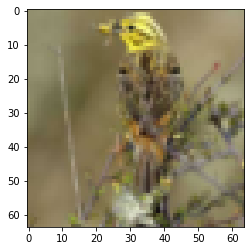

In [29]:
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(to_pil_image (x))
plt.imshow(to_pil_image (0.5*x+0.5))

In [17]:
train_dl = torch.utils.data.DataLoader (celeb_ds , batch_size = 32,
                                   shuffle = True)

NameError: ignored

In [16]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds , batch_size = 32 , shuffle = True)

In [33]:
for x,y in train_dl:
    print(x.shape,y.shape)
    break

torch.Size([32, 3, 64, 64]) torch.Size([32])


### **GENERATOR CLASS**

In [37]:
from torch import nn
import torch.nn.functional as F

class Generator(nn.Module):
    def__init__(self, params):

        super(Generator, self).__init__()
        nz = params["nz"]
        ngf = params["ngf"]
        noc = params["noc"]

        self.dconv1 = nn.ConvTranspose2d(nz , ngf*8 ,
                                        kernel_size = 4,stride = 1,
                                        padding =0,bias = False)
        self.bn1 = nn.BatchNorm2d(ngf * 8)

        self.dconv2 = nn.ConvTranspose2d(ngf*8 , ngf*4 ,
                                        kernel_size = 4,stride = 2,
                                        padding =1,bias = False)
        self.bn2 = nn.BatchNorm2d(ngf * 4)

        self.dconv2 = nn.ConvTranspose2d(ngf*4 , ngf*2 ,
                                        kernel_size = 4,stride = 2,
                                        padding =1,bias = False)
        self.bn3 = nn.BatchNorm2d(ngf * 2)

        self.dconv4 = nn.ConvTranspose2d(ngf*2 , ngf ,
                                        kernel_size = 4,stride = 2,
                                        padding =1,bias = False)
        self.bn4 = nn.BatchNorm2d(ngf)

        self.dconv5 = nn.ConvTranspose2d(ngf , noc ,
                                        kernel_size = 4,stride = 2,
                                        padding =1,bias = False)
            

    def forward(self,x):
        x=F.relu(self.bn1(self.dconv1(x)))
        x=F.relu(self.bn2(self.dconv2(x)))
        x=F.relu(self.bn3(self.dconv3(x)))
        x=F.relu(self.bn4(self.dconv4(x)))
        out=torch.tanh(self.dconv5(x))
        return out




    

SyntaxError: ignored